### ▶2023/08/07 t-SNEとUMAPに2値ストロークデータを入力してみる

In [7]:
import numpy as np
import pandas as pd
from preprocess import Preprocess
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

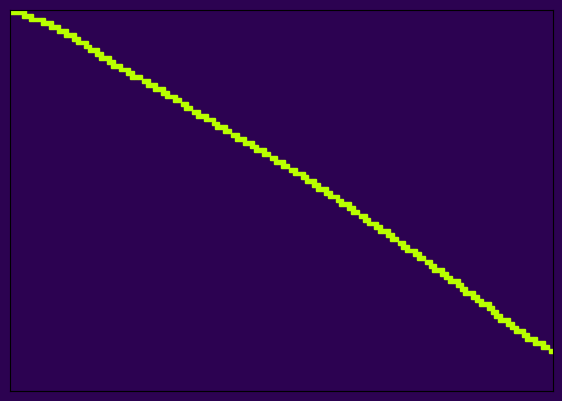

In [3]:
data = Preprocess('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists', 1)
ihara_box_1_df = data.df_dropcol
data.draw_stroke_px(ihara_box_1_df[0:1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


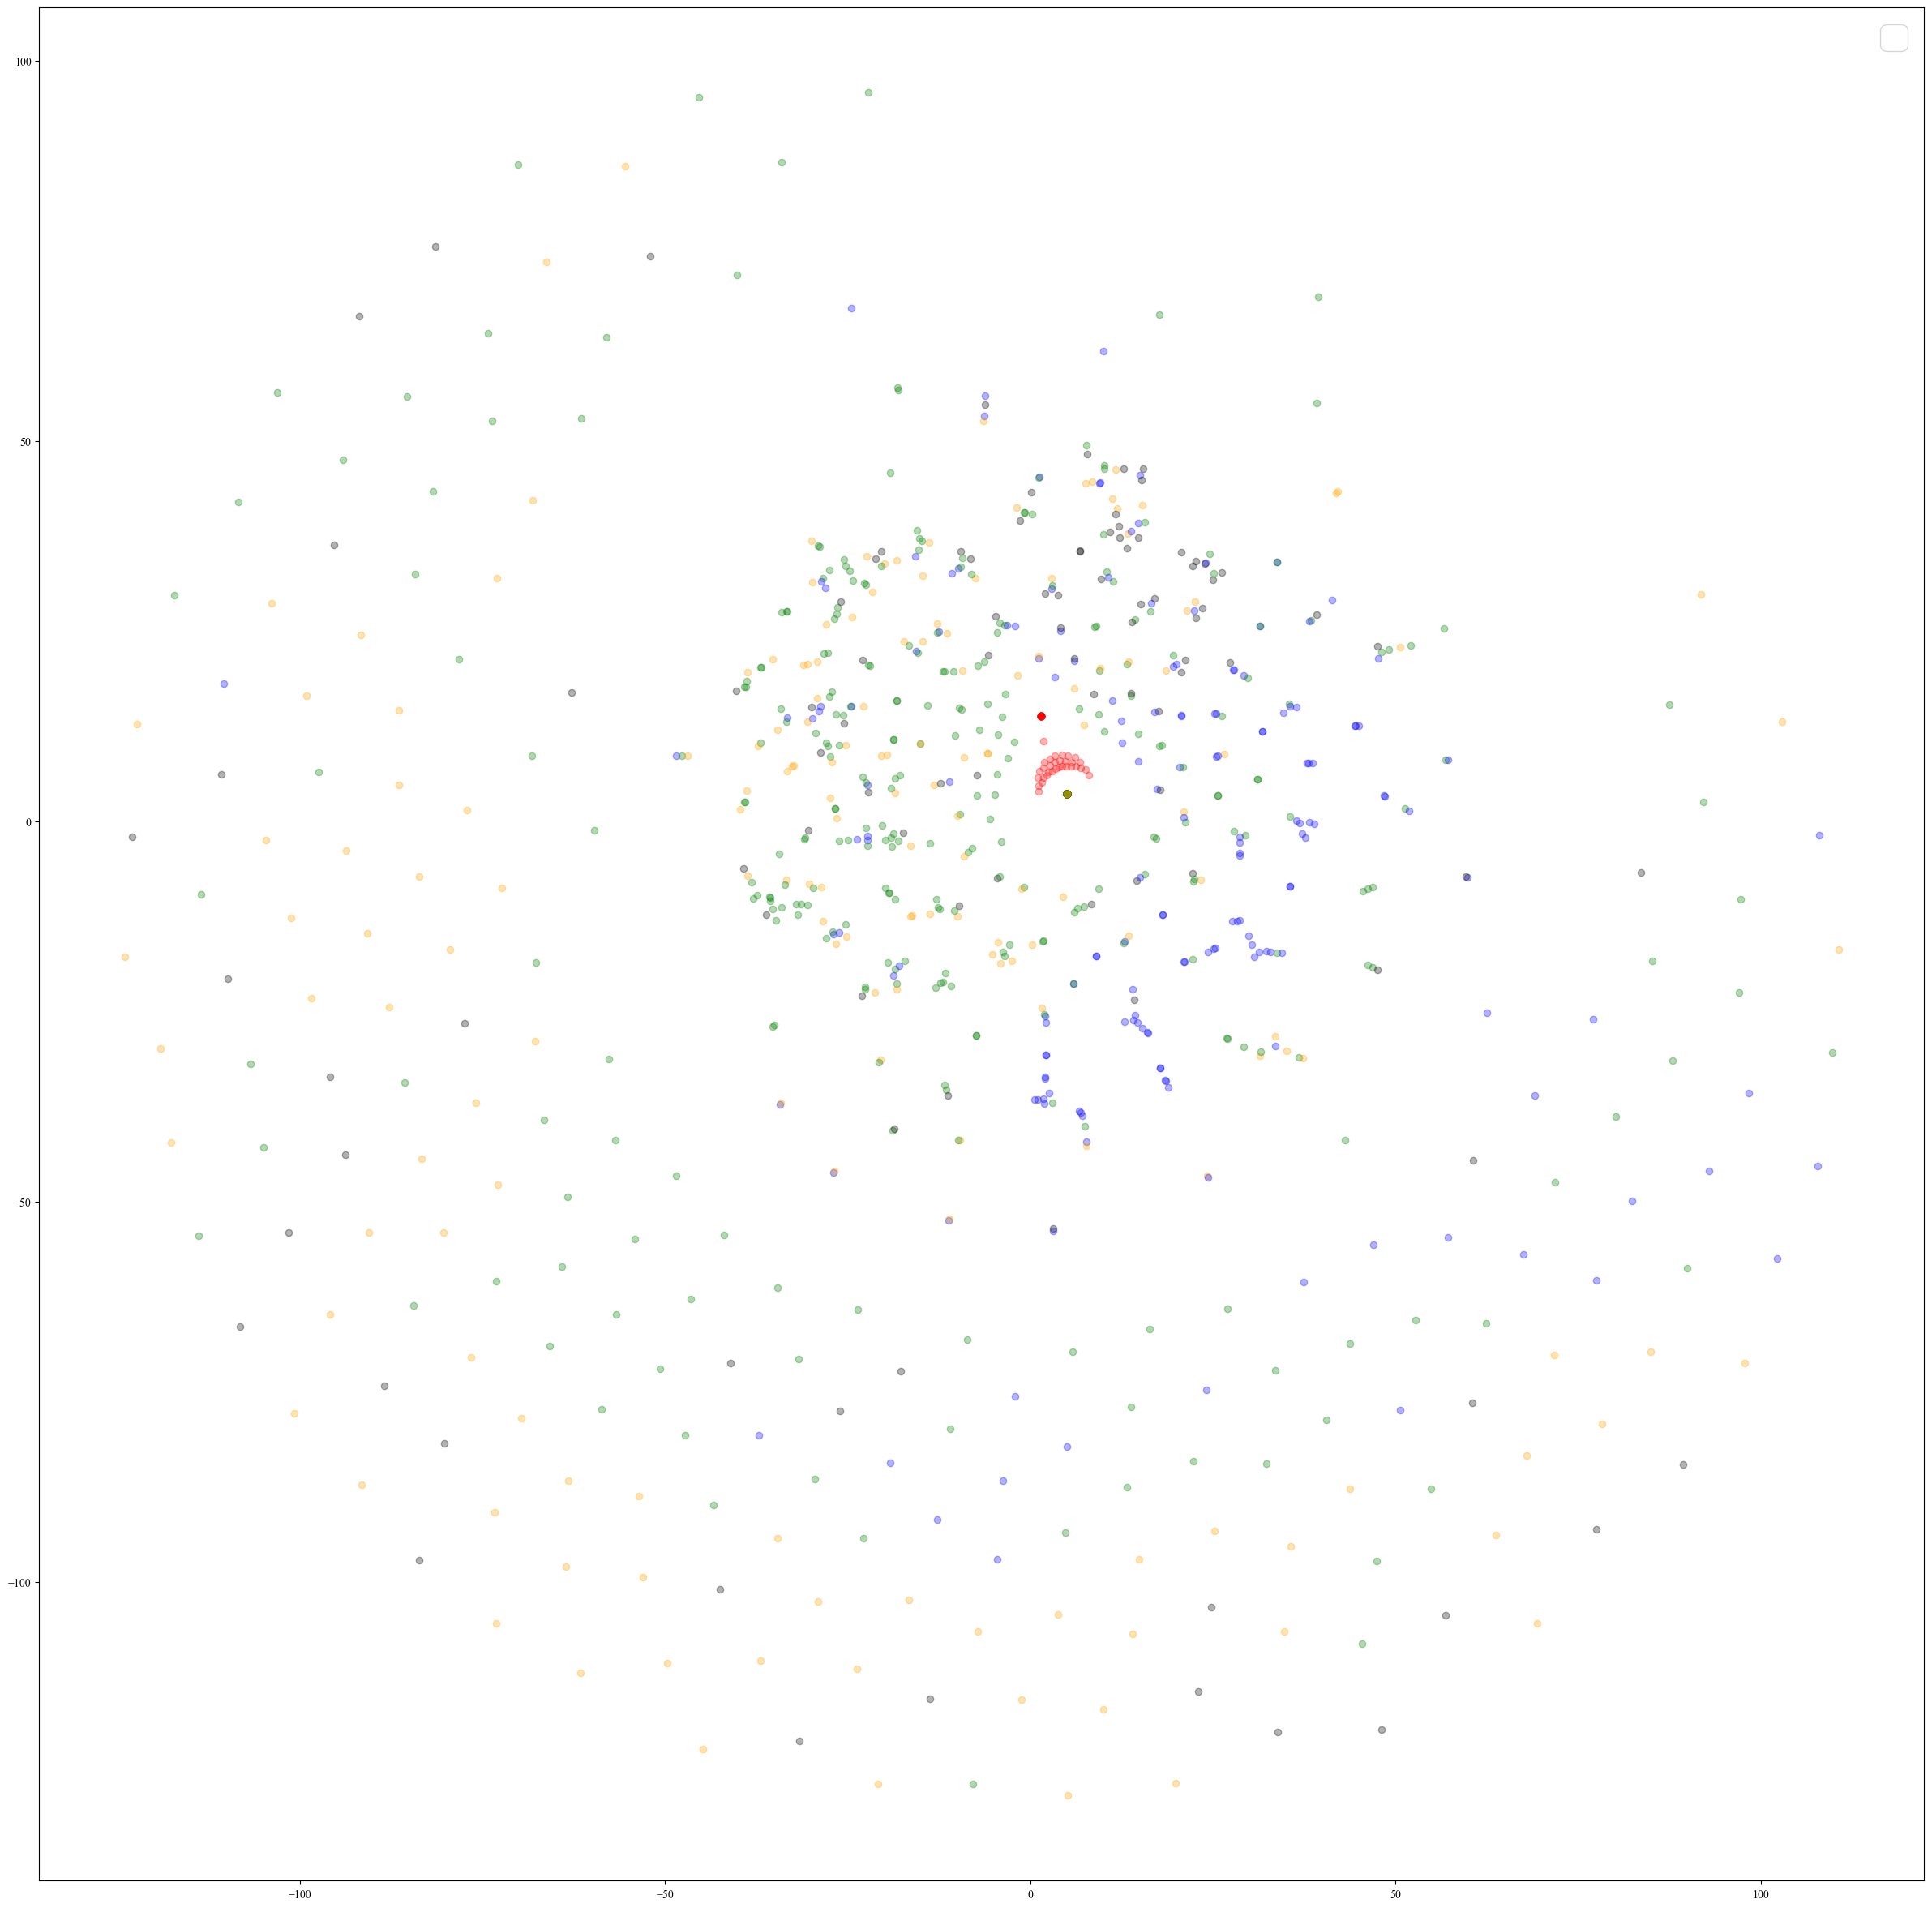

In [11]:
df_input = ihara_box_1_df.copy()
ser_input = df_input['px_3mm_grid_flat']
arr_input = list(ser_input)
nparray_input = np.array(arr_input)
tsne = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 1000)
x_embedded = tsne.fit_transform(nparray_input)
df_output = pd.concat([df_input, pd.DataFrame(x_embedded, columns = ['tsne_col0', 'tsne_col1'])], axis = 1)
colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

# df_input['tsne_col0'] = x_embedded[0]
# df_input['tsne_col1'] = x_embedded[1]

for st_type, col0, col1 in zip(df_output['shape_int'], df_output['tsne_col0'], df_output['tsne_col1']):
    plt.scatter(col0, col1, color=colors[st_type], alpha=0.3)

plt.legend(fontsize = 30)


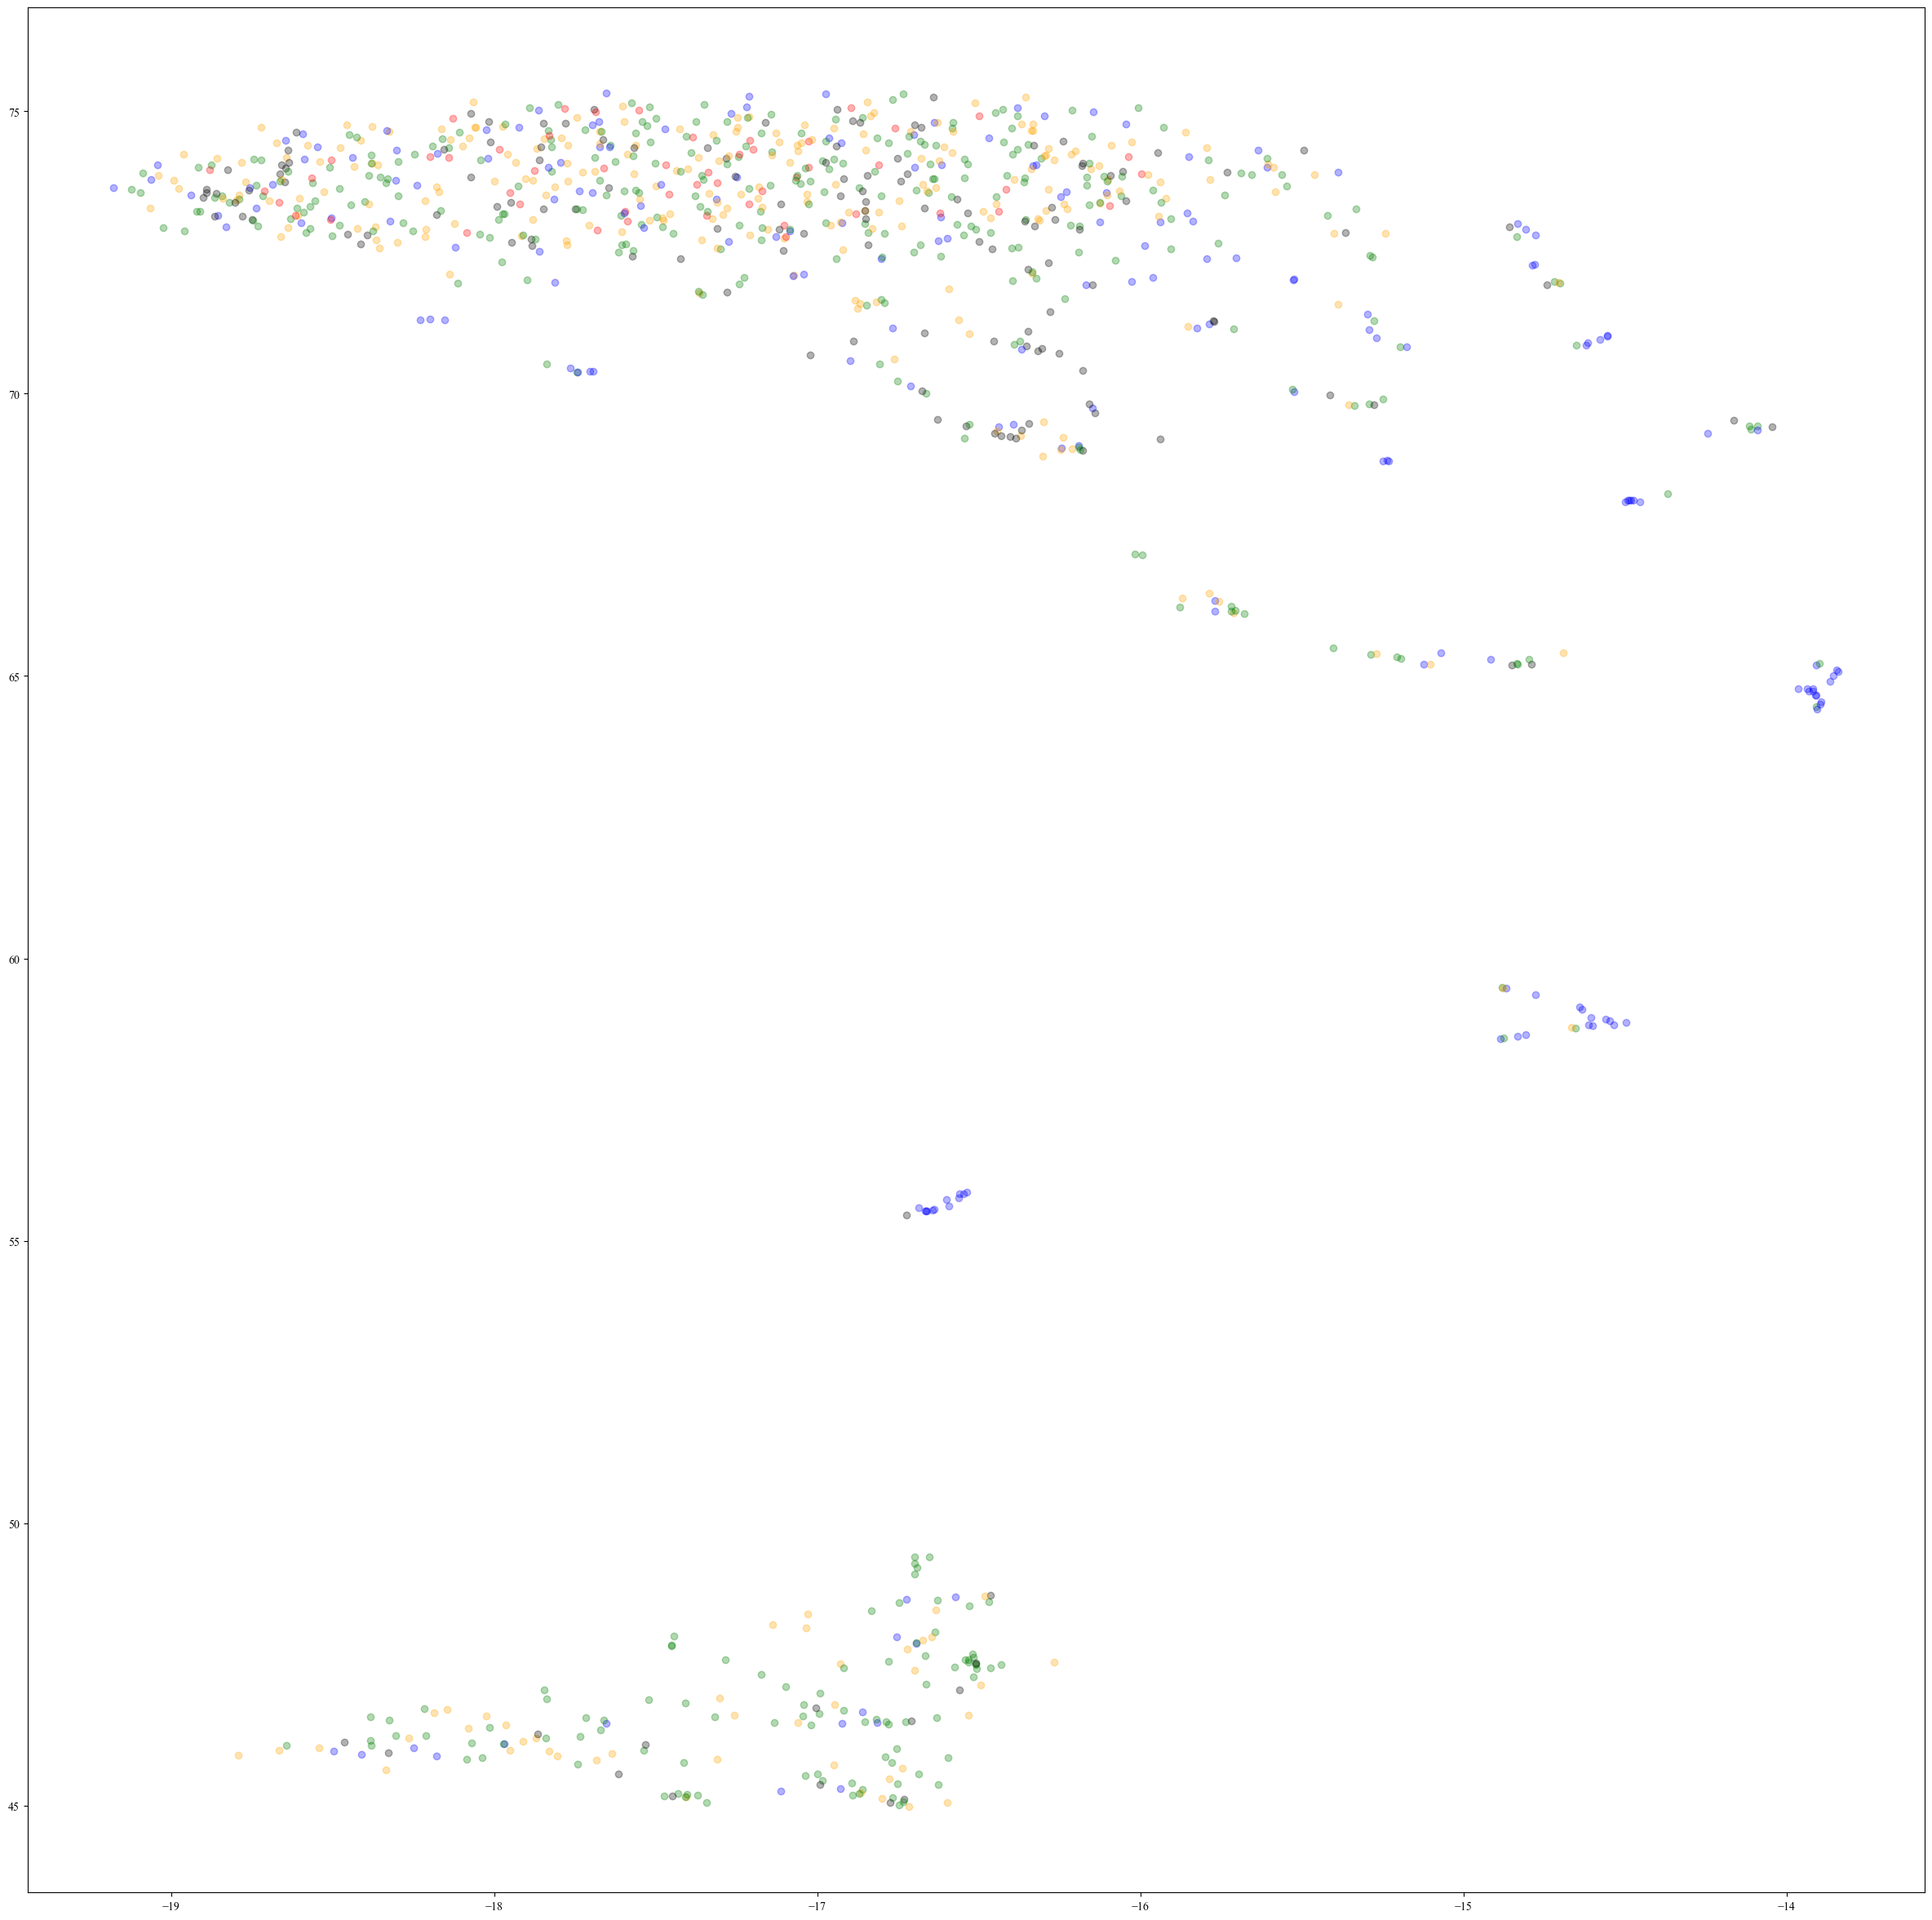

In [12]:
# UMAP
mapper = umap.UMAP(n_components=2, 
                   n_neighbors=10,
                   random_state=0)
umap_embedded = mapper.fit_transform(nparray_input)
df_output_umap = pd.concat([df_input, pd.DataFrame(umap_embedded, columns = ['umap_col0', 'umap_col1'])], axis = 1)
colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))
for st_shape, col0, col1 in zip(df_output_umap['shape_int'], df_output_umap['umap_col0'], df_output_umap['umap_col1']):
    plt.scatter(col0, col1, color=colors[st_shape], alpha=0.3)

plt.show()

In [13]:
df_point = ihara_box_1_df[ihara_box_1_df['shape_int'] == 0]
df_point

,time,max_points,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,px_3mm_grid,px_3mm_grid_flat
167,165,1,Point,0.000000,0,0.000000,[274.9875],[187.3875],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
177,189,3,Point,63.333333,0,1.411384,"[337.3875, 336.975, 336.15]","[134.5875, 134.775, 135.26250000000002]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
186,214,4,Point,67.000000,0,0.448924,"[167.9625, 168.07500000000002, 168.22500000000...","[237.225, 237.3, 237.3375, 237.225]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
187,214,5,Point,88.000000,0,1.440281,"[167.88750000000002, 167.88750000000002, 168.0...","[236.325, 236.5125, 236.775, 237.375, 237.45]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
190,219,2,Point,47.000000,0,0.386086,"[272.925, 272.7375]","[141.45000000000002, 141.7875]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
205,263,6,Point,77.000000,0,0.342116,"[199.6125, 199.6125, 199.57500000000002, 199.4...","[163.20000000000002, 163.20000000000002, 163.2...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
208,268,5,Point,90.400000,0,1.975209,"[196.4625, 196.38750000000002, 196.38750000000...","[148.8375, 148.8, 148.76250000000002, 148.3125...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
214,291,3,Point,9.333333,0,0.878865,"[177.525, 177.82500000000002, 178.20000000000002]","[151.2375, 150.975, 150.675]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
310,426,2,Point,81.000000,0,1.282697,"[151.8, 150.78750000000002]","[154.0875, 154.875]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
312,427,1,Point,0.000000,0,0.000000,[157.5],[148.125],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [15]:
df_input = df_point.copy()
ser_input = df_input['px_3mm_grid_flat']
arr_input = list(ser_input)
nparray_input = np.array(arr_input)
mapper = umap.UMAP(n_components=2, 
                   n_neighbors=10,
                   random_state=0)
umap_embedded = mapper.fit_transform(nparray_input)
df_output_umap = pd.concat([df_input, pd.DataFrame(umap_embedded, columns = ['umap_col0', 'umap_col1'])], axis = 1)
colors =  ["red", "blue", "green", "orange", "black"]
# plt.figure(figsize = (30, 30))
# for st_shape, col0, col1 in zip(df_output_umap['shape_int'], df_output_umap['umap_col0'], df_output_umap['umap_col1']):
#     plt.scatter(col0, col1, color=colors[st_shape], alpha=0.3)

# plt.show()
df_output_umap

,time,max_points,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,px_3mm_grid,px_3mm_grid_flat,umap_col0,umap_col1
167,165.0,1.0,Point,0.000000,0.0,0.000000,[274.9875],[187.3875],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
177,189.0,3.0,Point,63.333333,0.0,1.411384,"[337.3875, 336.975, 336.15]","[134.5875, 134.775, 135.26250000000002]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
186,214.0,4.0,Point,67.000000,0.0,0.448924,"[167.9625, 168.07500000000002, 168.22500000000...","[237.225, 237.3, 237.3375, 237.225]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
187,214.0,5.0,Point,88.000000,0.0,1.440281,"[167.88750000000002, 167.88750000000002, 168.0...","[236.325, 236.5125, 236.775, 237.375, 237.45]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
190,219.0,2.0,Point,47.000000,0.0,0.386086,"[272.925, 272.7375]","[141.45000000000002, 141.7875]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.763179,20.436888
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.885883,20.671461
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.745592,20.993652
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.209360,20.463448
